# Name: << Doris Chen >>

### Test 2B (Computer Programming) Winter 2020-21

**Directions** You may use your notes and/or web resources. You must do your own work.

The file `Sales_train.csv` contains data that you will use to train a Decision Tree classifier to predict the sales (L, M, H) of a car seat at a particular store location. You will be asked to:

* provide a baseline error rate.
* validation error rate for your trained classifier.
* predictions of the sales (L, M, H) corresponding to attributes provided in the file `Sales_attributes_test.csv`.

**Make sure that you run your entire notebook from beginning to end before submitting it to the Moodle drop box in both `.ipynb` and `.html` format.** 

When you are done, submit the following **three** files to the Moodle drop box. 

* T2B.ipynb
* T2B.html
* Sales_predict.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz

# 1. Baseline Error Rate

In [2]:
# Directions: In this cell, load Sales_train.csv into the data frame df. 
#             Modify the path to the csv file as needed.
df = pd.read_csv('./Sales_train.csv')
df.head(3)

,ShelveLoc,Urban,US,Price,Sales
0,Bad,Yes,Yes,120,H
1,Medium,Yes,Yes,80,H
2,Medium,Yes,Yes,97,M


#### Check: The output of `df.head(3)` should be the same as the table below:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ShelveLoc</th>
      <th>Urban</th>
      <th>US</th>
      <th>Price</th>
      <th>Sales</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Bad</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>120</td>
      <td>H</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Medium</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>80</td>
      <td>H</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Medium</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>97</td>
      <td>M</td>
    </tr>
  </tbody>
</table>

In [3]:
# Directions: In the cells below this line, compute a baseline error rate. 
#             Your answer should be assigned to the variable: baseline_error_rate.

In [4]:
target = df.Sales
attributes = df.drop(['Sales'], axis = 1)
attributes.shape

(200, 4)

In [5]:
target.value_counts()

M    75
L    66
H    59
Name: Sales, dtype: int64

In [6]:
baseline_error_rate = round(1 - target.value_counts().max() / target.shape[0],3)

In [7]:
# Directions: DO NOT MODIFY THIS CELL. It prints out your baseline error rate.
print('baseline error rate:',baseline_error_rate)

baseline error rate: 0.625


# 2. Decision Tree Classifier

In [8]:
# Directions: In the cells below this line, train a Decision Tree classifier using the 
#             training data contained in df. Your validation error rate should be named
#             validation_error_rate.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ShelveLoc  200 non-null    object
 1   Urban      200 non-null    object
 2   US         200 non-null    object
 3   Price      200 non-null    int64 
 4   Sales      200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [10]:
attributes = pd.get_dummies(attributes)

In [11]:
attributes.head(5)

,Price,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,120,1,0,0,0,1,0,1
1,80,0,0,1,0,1,0,1
2,97,0,0,1,0,1,0,1
3,108,0,0,1,0,1,1,0
4,124,0,0,1,1,0,1,0


In [12]:
hparam = {'max_depth':np.arange(1,50)}
Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid = hparam) 
TreeCV.fit(attributes,target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

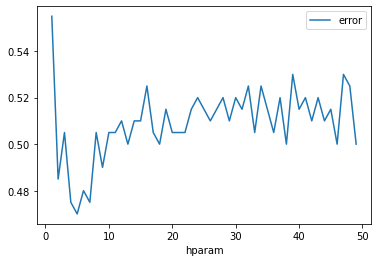

In [13]:
results = pd.DataFrame()
results['hparam'] = hparam['max_depth']
results['error'] = 1 - TreeCV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [14]:
TreeCV.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [15]:
validation_error_rate = round(1 - TreeCV.best_score_, 3)

In [16]:
# DO NOT MODIFY THIS CELL. It prints out your validation error rate
print('validation error rate:',validation_error_rate)

validation error rate: 0.47


# 3. Predictions
#### Predict the sales (L, M, H) corresponding to the attributes given in the file `Sales_attributes_test.csv`.  You answer should be saved in a file named `Sales_predictions.csv`. (See the last cell.)

In [17]:
# Directions: In this cell, load the sales attributes to be used for making your predictions.
attributes_test = pd.read_csv('./Sales_attributes_test.csv')
attributes_test.head(3)

,ShelveLoc,Urban,US,Price
0,Bad,No,No,114
1,Good,Yes,No,128
2,Medium,Yes,Yes,120


#### Check: The output of `attributes_test.head(3)` should be the same as table below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ShelveLoc</th>
      <th>Urban</th>
      <th>US</th>
      <th>Price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Bad</td>
      <td>No</td>
      <td>No</td>
      <td>114</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Good</td>
      <td>Yes</td>
      <td>No</td>
      <td>128</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Medium</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>120</td>
    </tr>
  </tbody>
</table>

In [18]:
# Directions: In the cells below this line, predict the sales (L,M,H) for the test attributes.
#             Your predictions should be a single column data frame named Sales_predictions.

In [19]:
attributes_test = pd.get_dummies(attributes_test)
Sales_predictions = TreeCV.predict(attributes_test)

In [20]:
# Directions: This cell checks that your predictions are contained 
#             in a single column dataframe called Sales_predictions
Sales_predictions = pd.DataFrame(Sales_predictions,columns=['Sales'])
Sales_predictions.head(3)

,Sales
0,L
1,M
2,M


#### Check: The output of `Sales_predictions.head(3)` should be **similar** to the table below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Sales</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>L</td>
    </tr>
    <tr>
      <th>1</th>
      <td>M</td>
    </tr>
    <tr>
      <th>2</th>
      <td>M</td>
    </tr>
  </tbody>
</table>

In [21]:
# This cell saves your predictions to a file named Sales_predictions
Sales_predictions.to_csv('./Sales_predictions.csv',index=False)